In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from scipy.stats import mode
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

In [2]:
airbnb = pd.read_csv("data/train.csv")
airbnb.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,22267382,Modern and Cozy Large Studio in Brooklyn,Modern large studio with new amenities and app...,Our place is a little quiet sanctuary in the h...,Modern large studio with new amenities and app...,none,"BAM, Barclays, Brooklyn City Point, Fort Green...",NaN,"Subway: 2,3,4,5,A,C,B,Q,G",Washer/Dryer Dishwasher Internet Gym Roof Top ...,...,10.0,10.0,10.0,t,f,flexible,f,f,1,0.59
1,2473861,Royal Harlem TRIPLEX Home 5 Beds,Harlem is back and so gorgeous! Visit and expl...,Harlem is back and so gorgeous! Visit and expl...,Harlem is back and so gorgeous! Visit and expl...,none,HARLEM is a piece of real NY history overflowi...,HARLEM RESTAURANTS Red Rooster Harlem -- excel...,PUBLIC TRANSPORTATION: Conveniently near all p...,The WHOLE ENTIRE HOUSE,...,9.0,9.0,9.0,t,f,moderate,f,f,3,2.47
2,25079703,Sunny East Village Studio,"Clean, hip and well designed sun drenched East...",This is a rare East Village studio with it's h...,"Clean, hip and well designed sun drenched East...",none,East Village is one of the last remaining neig...,NaN,NaN,You'll have access to the entire space - it's ...,...,10.0,10.0,10.0,f,f,moderate,f,f,1,0.89
3,9342478,"Beautiful, airy, light-filled room","Private, spacious, comfortable room in 2-bed f...","Big closet, two big windows, tall ceiling and ...","Private, spacious, comfortable room in 2-bed f...",none,One block from Morgan L stop. Super cool area....,NaN,NaN,NaN,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
4,4866426,Private Room in Prime Brooklyn Spot,"Comfy, quiet and big private room in a three b...",This big old apartment that we love and take c...,"Comfy, quiet and big private room in a three b...",none,I absolutely love this neighborhood - right at...,Just a note about the space: The window in you...,Super convenient to almost all subway lines. A...,Your room has a very comfortable queen sized b...,...,10.0,10.0,10.0,f,f,flexible,f,f,1,3.14


In [5]:
smogn = pd.read_csv("data/cleaned.csv")

In [13]:
data = smogn.drop(["Unnamed: 0", "index"], axis=1)
data

,transit,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,market,property_type,room_type,accommodates,...,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,since_year,since_month,since_day
0,0,0,1,0,Murray Hill,Manhattan,New York,Serviced apartment,Entire home/apt,2,...,9.396918,0,moderate,0,0,46,0.000000,2017.041912,2.991143,14.109356
1,0,1,1,0,Murray Hill,Manhattan,New York,Serviced apartment,Entire home/apt,2,...,9.406697,0,moderate,0,0,46,0.002744,2016.970499,2.987486,14.117610
2,0,0,1,0,Murray Hill,Manhattan,New York,Serviced apartment,Entire home/apt,5,...,4.000252,1,moderate,0,0,11,0.130128,2016.983235,2.007705,10.119216
3,0,0,1,1,Financial District,Manhattan,New York,Apartment,Entire home/apt,5,...,5.700325,1,strict_14_with_grace_period,0,0,6,0.511319,2016.574919,2.850162,10.425081
4,0,0,1,0,Lower East Side,Manhattan,New York,Apartment,Entire home/apt,3,...,9.244227,0,flexible,0,0,4,0.328153,2012.244227,7.755773,15.465361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28186,1,0,1,1,Windsor Terrace,Brooklyn,New York,Apartment,Entire home/apt,7,...,10.000000,0,strict_14_with_grace_period,0,0,4,0.270000,2016.000000,5.000000,3.000000
28187,1,0,1,1,Theater District,Manhattan,New York,Serviced apartment,Entire home/apt,8,...,9.000000,0,strict_14_with_grace_period,0,0,1,2.280000,2015.000000,8.000000,21.000000
28188,0,0,1,1,Woodside,Queens,New York,House,Private room,1,...,9.401775,0,flexible,0,0,1,0.000000,2012.000000,5.000000,3.000000
28189,1,0,1,1,Washington Heights,Manhattan,New York,Apartment,Private room,2,...,10.000000,0,moderate,0,0,3,0.100000,2014.000000,7.000000,6.000000


In [22]:
# 初步drop缺失值过多、长段文字、或者host-unique的features
def drop_initial(df): 
    cols = ["id", "name", "summary", "space", "experiences_offered", 
            "access", "host_acceptance_rate", "notes",
            "description", "neighborhood_overview", "interaction",
            "house_rules", "host_id", "host_name", "host_about",
            "host_location", "city", "state", "zipcode", "country",
            "country_code", "host_response_time", "host_neighbourhood",
             "host_listings_count",
            "host_response_rate", "square_feet", "host_verifications",
            "maximum_nights",
            "minimum_nights","is_business_travel_ready", "first_review", 
            "last_review"]
    return df.drop(cols,  axis = 1)

In [23]:
def to_num(df):
    df["extra_people"] = df.extra_people.str.replace("$", "", regex = False).astype(float)
    return df

In [24]:
def remove_outliers(data):
    df = data.copy(deep = True)
    df = df[(df["reviews_per_month"] < 10) | (df["reviews_per_month"].isnull())]
    df = df[(df["bathrooms"] < 10) | (df["bathrooms"].isnull())]
    df = df[(df["review_scores_cleanliness"] > 2) | (df["review_scores_cleanliness"].isnull())]
    df = df[(df["review_scores_accuracy"] > 2) | (df["review_scores_accuracy"].isnull())]
    df = df[(df["review_scores_location"] > 2) | (df["review_scores_location"].isnull())]
    df = df[(df["review_scores_checkin"] > 2) | (df["review_scores_checkin"].isnull())]
    df = df[(df["review_scores_communication"] > 2) | (df["review_scores_communication"].isnull())]
    df = df[(df["review_scores_value"] > 2) | (df["review_scores_value"].isnull())]
    df = df[(df["number_of_reviews"] < 300) | (df["number_of_reviews"].isnull())]
    return df

In [25]:
# for col in cur.columns:
#     if isinstance(cur[col][0], str) :
#         print("----------%s----------"%col)
#         print(cur[col].value_counts(dropna=False))

In [26]:
# 进行feature tranformation
def engineer_features(df):
    # transform host_since
    since = pd.to_datetime(df["host_since"]).dt
    df = df.drop("host_since", axis = 1)
    df["since_year"] = since.year
    df["since_month"] = since.month
    df["since_day"] = since.day
    # transform binary columns
    tfmap = {"f": 0, "t": 1}
    df["host_is_superhost"] = df["host_is_superhost"].fillna("f").map(tfmap)
    df["host_identity_verified"] = df["host_identity_verified"].fillna("f").map(tfmap)
    df["require_guest_phone_verification"] = df["require_guest_phone_verification"].map(tfmap)
    df["instant_bookable"] = df["instant_bookable"].map(tfmap)
    df["host_has_profile_pic"] = df["host_has_profile_pic"].fillna("f").map(tfmap)
    df["require_guest_profile_picture"] = df["require_guest_profile_picture"].fillna("f").map(tfmap)
    
    # transform amenities
    df["amenities"] = airbnb["amenities"].str.replace("{", "", regex = False)\
                                             .replace("}", "", regex = False)\
                                             .str.split(",").apply(len)
    df["transit"] = df["transit"].apply(lambda x: 0 if pd.isnull(x) else 1)
    # transform property types
    ptmap = {"Villa":"Other",
             "Bungalow":"Other",
             "Tiny house":"Other",
             "Aparthotel":"Other",
             "Boat":"Other",
             "Camper/RV":"Other",
             "Tent":"Other",
             "Cottage":"Other",
             "Houseboat":"Other",
             "Cabin":"Other",
             "Chalet":"Other",
             "Timeshare":"Other",
             "Train":"Other",
             "Island":"Other",
             "Casa particular (Cuba)":"Other"}
    df["property_type"].replace(ptmap, inplace = True)
    # transforom cancellation policy
#     cpmap = {"super_strict_60": "strict",
#              "super_strict_30": "strict",
#              "strict": "strict",
#              "long_term": "strict"}
#     df["cancellation_policy"].replace(cpmap, inplace = True)
    # na
    return df

In [27]:
engineer_features(airbnb)

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,since_year,since_month,since_day
0,22267382,Modern and Cozy Large Studio in Brooklyn,Modern large studio with new amenities and app...,Our place is a little quiet sanctuary in the h...,Modern large studio with new amenities and app...,none,"BAM, Barclays, Brooklyn City Point, Fort Green...",NaN,1,Washer/Dryer Dishwasher Internet Gym Roof Top ...,...,1,f,flexible,0,0,1,0.59,2012.0,3.0,12.0
1,2473861,Royal Harlem TRIPLEX Home 5 Beds,Harlem is back and so gorgeous! Visit and expl...,Harlem is back and so gorgeous! Visit and expl...,Harlem is back and so gorgeous! Visit and expl...,none,HARLEM is a piece of real NY history overflowi...,HARLEM RESTAURANTS Red Rooster Harlem -- excel...,1,The WHOLE ENTIRE HOUSE,...,1,f,moderate,0,0,3,2.47,2013.0,9.0,14.0
2,25079703,Sunny East Village Studio,"Clean, hip and well designed sun drenched East...",This is a rare East Village studio with it's h...,"Clean, hip and well designed sun drenched East...",none,East Village is one of the last remaining neig...,NaN,0,You'll have access to the entire space - it's ...,...,0,f,moderate,0,0,1,0.89,2012.0,12.0,11.0
3,9342478,"Beautiful, airy, light-filled room","Private, spacious, comfortable room in 2-bed f...","Big closet, two big windows, tall ceiling and ...","Private, spacious, comfortable room in 2-bed f...",none,One block from Morgan L stop. Super cool area....,NaN,0,NaN,...,0,f,flexible,0,0,1,NaN,2013.0,12.0,3.0
4,4866426,Private Room in Prime Brooklyn Spot,"Comfy, quiet and big private room in a three b...",This big old apartment that we love and take c...,"Comfy, quiet and big private room in a three b...",none,I absolutely love this neighborhood - right at...,Just a note about the space: The window in you...,1,Your room has a very comfortable queen sized b...,...,0,f,flexible,0,0,1,3.14,2012.0,5.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33533,3958032,Private Room Amazing View in EV,"Private room in cozy, sun-drenched & plant fil...",NaN,"Private room in cozy, sun-drenched & plant fil...",none,NaN,NaN,0,NaN,...,0,f,strict_14_with_grace_period,0,0,1,0.44,2012.0,6.0,18.0
33534,7987209,Floor 35th in the heart of New York,This is a beautiful four bedroom and three bat...,This is a Duplex Apartment (2 floors) Main Flo...,This is a beautiful four bedroom and three bat...,none,LOCATION LOCATION LOCATION. Walk to Time Squar...,NaN,1,Access to the unit is through elevators.,...,0,f,strict_14_with_grace_period,0,0,1,2.28,2015.0,8.0,21.0
33535,796128,Cozy room for rent in duplex house,NaN,Room for rent in duplex house located in Astor...,Room for rent in duplex house located in Astor...,none,NaN,NaN,0,NaN,...,0,f,flexible,0,0,1,NaN,2012.0,5.0,3.0
33536,17281121,"Beautiful 1 bedroom apart, Washington Heights",Very spacious bright beautiful apartment in Wa...,"Very spacious living room, bright kitchen with...",Very spacious bright beautiful apartment in Wa...,none,Very close to Times Square but a quiet residen...,NaN,1,"Living room, bedroom, shared kitchen and bathr...",...,0,f,moderate,0,0,3,0.10,2014.0,7.0,6.0


In [28]:
if np.nan:
    print(1)

1


In [29]:
def fill_missing(df):
    df["bathrooms"] = df.groupby("room_type")["bathrooms"].transform(lambda x: x.fillna(mode(x).mode[0]))
    df["bedrooms"] = df.groupby("accommodates")["bedrooms"].transform(lambda x: x.fillna(mode(x).mode[0]))
    df["beds"] = df.groupby("accommodates")["beds"].transform(lambda x: x.fillna(mode(x).mode[0]))
    df["since_year"] = df["since_year"].fillna(mode(df["since_year"]).mode[0])
    df["since_month"] = df["since_month"].fillna(mode(df["since_month"]).mode[0])
    df["since_day"] = df["since_day"].fillna(mode(df["since_day"]).mode[0])
    df["market"] = df["market"].fillna(mode(df["market"]).mode[0])
    tofill = ["review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value"        
    ]
    for i in tofill:
        df[i] = df[i].fillna(np.mean(df[i]))
    df["reviews_per_month"] = df["reviews_per_month"].fillna(0)
    return df

In [30]:
def pre_transformation(df):
    res = drop_initial(df)
    res = to_num(res)
    res = remove_outliers(res)
    res = engineer_features(res)
    res = fill_missing(res)
    return res

In [31]:
pre_transformation(airbnb)

,transit,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,market,property_type,room_type,accommodates,...,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,since_year,since_month,since_day
0,1,0,1,1,Fort Greene,Brooklyn,New York,Loft,Entire home/apt,2,...,10.000000,1,flexible,0,0,1,0.59,2012.0,3.0,12.0
1,1,0,1,1,Harlem,Manhattan,New York,House,Entire home/apt,8,...,9.000000,1,moderate,0,0,3,2.47,2013.0,9.0,14.0
2,0,0,1,1,East Village,Manhattan,New York,Apartment,Entire home/apt,2,...,10.000000,0,moderate,0,0,1,0.89,2012.0,12.0,11.0
3,0,0,1,1,Williamsburg,Brooklyn,New York,Apartment,Private room,1,...,9.401775,0,flexible,0,0,1,0.00,2013.0,12.0,3.0
4,1,1,1,1,Boerum Hill,Brooklyn,New York,Apartment,Private room,2,...,10.000000,0,flexible,0,0,1,3.14,2012.0,5.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33533,0,0,1,1,East Village,Manhattan,New York,Apartment,Private room,2,...,8.000000,0,strict_14_with_grace_period,0,0,1,0.44,2012.0,6.0,18.0
33534,1,0,1,1,Theater District,Manhattan,New York,Serviced apartment,Entire home/apt,8,...,9.000000,0,strict_14_with_grace_period,0,0,1,2.28,2015.0,8.0,21.0
33535,0,0,1,1,Woodside,Queens,New York,House,Private room,1,...,9.401775,0,flexible,0,0,1,0.00,2012.0,5.0,3.0
33536,1,0,1,1,Washington Heights,Manhattan,New York,Apartment,Private room,2,...,10.000000,0,moderate,0,0,3,0.10,2014.0,7.0,6.0


In [116]:
pre_transformation(airbnb)

,transit,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,market,property_type,room_type,accommodates,...,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,since_year,since_month,since_day
0,1,0,1,1,Fort Greene,Brooklyn,New York,Loft,Entire home/apt,2,...,10.000000,1,flexible,0,0,1,0.59,2012.0,3.0,12.0
1,1,0,1,1,Harlem,Manhattan,New York,House,Entire home/apt,8,...,9.000000,1,moderate,0,0,3,2.47,2013.0,9.0,14.0
2,0,0,1,1,East Village,Manhattan,New York,Apartment,Entire home/apt,2,...,10.000000,0,moderate,0,0,1,0.89,2012.0,12.0,11.0
3,0,0,1,1,Williamsburg,Brooklyn,New York,Apartment,Private room,1,...,9.401775,0,flexible,0,0,1,0.00,2013.0,12.0,3.0
4,1,1,1,1,Boerum Hill,Brooklyn,New York,Apartment,Private room,2,...,10.000000,0,flexible,0,0,1,3.14,2012.0,5.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33533,0,0,1,1,East Village,Manhattan,New York,Apartment,Private room,2,...,8.000000,0,strict_14_with_grace_period,0,0,1,0.44,2012.0,6.0,18.0
33534,1,0,1,1,Theater District,Manhattan,New York,Serviced apartment,Entire home/apt,8,...,9.000000,0,strict_14_with_grace_period,0,0,1,2.28,2015.0,8.0,21.0
33535,0,0,1,1,Woodside,Queens,New York,House,Private room,1,...,9.401775,0,flexible,0,0,1,0.00,2012.0,5.0,3.0
33536,1,0,1,1,Washington Heights,Manhattan,New York,Apartment,Private room,2,...,10.000000,0,moderate,0,0,3,0.10,2014.0,7.0,6.0


In [78]:
pt = pre_transformation(airbnb)
pt = pd.concat([ex, pt])
pt.drop_duplicates(inplace = True)
pt

,transit,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,market,property_type,room_type,accommodates,...,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,since_year,since_month,since_day
10122,0,0,1,0,Murray Hill,Manhattan,New York,Serviced apartment,Entire home/apt,10,...,9.413376,0,moderate,0,0,0,0.057683,2014.044631,0.875256,7.062702
10123,0,0,0,0,Murray Hill,Manhattan,New York,Serviced apartment,Entire home/apt,9,...,9.396564,0,moderate,0,0,0,0.020436,2014.074104,1.000695,7.084530
10127,1,0,1,0,Murray Hill,Manhattan,New York,Serviced apartment,Entire home/apt,1,...,9.403356,0,moderate,0,0,0,0.000000,2012.027116,10.945948,5.023978
10131,0,0,1,0,Murray Hill,Manhattan,New York,Serviced apartment,Entire home/apt,5,...,7.972174,0,moderate,0,0,0,0.614703,2017.991666,6.000032,28.077438
10140,0,0,1,0,Murray Hill,Manhattan,New York,Serviced apartment,Entire home/apt,1,...,9.397560,0,moderate,0,0,6,0.026035,2010.969657,9.986771,6.838044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33533,0,0,1,1,East Village,Manhattan,New York,Apartment,Private room,2,...,8.000000,0,strict_14_with_grace_period,0,0,1,0.440000,2012.000000,6.000000,18.000000
33534,1,0,1,1,Theater District,Manhattan,New York,Serviced apartment,Entire home/apt,8,...,9.000000,0,strict_14_with_grace_period,0,0,1,2.280000,2015.000000,8.000000,21.000000
33535,0,0,1,1,Woodside,Queens,New York,House,Private room,1,...,9.401775,0,flexible,0,0,1,0.000000,2012.000000,5.000000,3.000000
33536,1,0,1,1,Washington Heights,Manhattan,New York,Apartment,Private room,2,...,10.000000,0,moderate,0,0,3,0.100000,2014.000000,7.000000,6.000000


In [76]:
import smogn

In [79]:
# Column transformer
categorical = ["neighbourhood_cleansed", "neighbourhood_group_cleansed", "property_type", "room_type", "bed_type", "cancellation_policy",
              "market"]
std= ["accommodates", "bathrooms", "bedrooms", "beds", "amenities", "guests_included",
      "extra_people", "number_of_reviews", "review_scores_rating", "review_scores_accuracy",
     "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication",
     "review_scores_location", "review_scores_value", "calculated_host_listings_count","since_year",
     "since_month", "since_day"]
clt = ColumnTransformer(
    transformers=[
        ("one-hot", OneHotEncoder(handle_unknown="ignore", sparse=False), categorical),
        ("standardization", StandardScaler(), std)
    ],
    remainder="passthrough"
)
clt.fit(pt.drop("price", axis = 1))



ColumnTransformer(remainder='passthrough',
                  transformers=[('one-hot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['neighbourhood_cleansed',
                                  'neighbourhood_group_cleansed',
                                  'property_type', 'room_type', 'bed_type',
                                  'cancellation_policy', 'market']),
                                ('standardization', StandardScaler(),
                                 ['accommodates', 'bathrooms', 'bedrooms',
                                  'beds', 'amenities', 'guests_included',
                                  'extra_people', 'number_of_reviews',
                                  'review_scores_rating',
                                  'review_scores_accuracy',
                                  'review_scores_cleanliness',
                                  're

In [80]:
X = clt.transform(pt.drop("price", axis=1))
y = pt.price

# MODEL FITTING

In [ ]:
noutliers = drop_initial(airbnb)
noutliers = to_num(noutliers)
noutliers = engineer_features(noutliers)
noutliers = fill_missing(noutliers)
# Column transformer
categorical = ["neighbourhood_cleansed", "neighbourhood_group_cleansed", "property_type", "room_type", "bed_type", "cancellation_policy"]
clt = ColumnTransformer(
    transformers=[
        ("one-hot", OneHotEncoder(handle_unknown="ignore", sparse=False), categorical),
    ],
    remainder="passthrough"
)
clt.fit(noutliers.drop("price", axis = 1))
X_no = clt.transform(noutliers.drop("price", axis = 1))
y_no = noutliers.price

In [34]:
from sklearn import metrics
import xgboost as xgb
import lightgbm as lgb


In [ ]:

best_depth = [5,6,7,8, 9]
best_min_cw = [4,5,6]
res = []
for i in best_depth:
    for j in best_depth:
        xgbr = xgb.XGBRegressor(max_depth=i, learning_rate=0.1, n_estimators=100, min_child_weight = j)
        res.append([i, j, -(cross_val_score(xgbr, X_no, y_no, cv = 5, scoring="neg_root_mean_squared_error").mean())])


In [ ]:
res

In [ ]:

res = []
best_max_dp = [10,11,12,13]
best_min_data_in_leaf = [16, 17, 18,19, 20]
num_leaves = [50,55,60, 65, 70]
for i in best_min_data_in_leaf:
    for j in num_leaves:
        for k in best_max_dp:
            gbm = lgb.LGBMRegressor(max_depth=k, min_data_in_leaf = i, num_leaves = j)
            res.append([i, j,k, -(cross_val_score(gbm, X, y, cv = 5, scoring="neg_root_mean_squared_error").mean())])

In [ ]:
best = 1000
best1 = 0
for i in res:
    if i[-1] < best:
        best = i[-1]
        best1 = i
best1

[500.0,
 490.0,
 480.0,
 470.0,
 460.0,
 450.0,
 440.0,
 430.0,
 420.0,
 410.0,
 400.0,
 390.0,
 380.0,
 370.0,
 360.0,
 350.0,
 340.0,
 330.0,
 320.0,
 310.0,
 300.0,
 290.0,
 280.0,
 270.0,
 260.0,
 250.0,
 240.0,
 230.0,
 220.0,
 210.0,
 200.0,
 190.0,
 180.0,
 170.0,
 160.0,
 150.0,
 140.0,
 130.0,
 120.0,
 110.0,
 100.0,
 90.0,
 80.0,
 70.0,
 60.0,
 50.0,
 40.0,
 30.0,
 20.0,
 10.0]

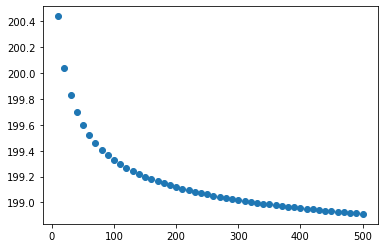

In [79]:
from sklearn.linear_model import Ridge
scr = []
alpha = []
for i in np.linspace(500, 10):
    ridge = Ridge(alpha = i)
    score = -(cross_val_score(ridge, X_over, y_over, cv = 5, scoring="neg_root_mean_squared_error").mean())
    scr.append(score)
    alpha.append(i)
plt.scatter(x=alpha, y = scr)
alpha

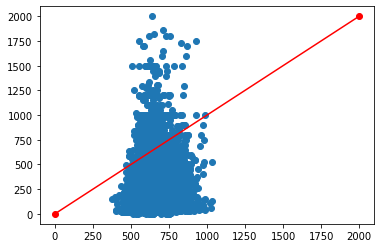

In [91]:
plt.scatter(x=Ridge(alpha=5).fit(X_over, y_over).predict(X), y=y)
plt.plot([0, 2000], [0, 2000], marker = "o", zorder = 3, color="red")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
depth = [2,3,4]
res = []
for d in depth:
    rdf = RandomForestRegressor(n_estimators=50, max_depth=14)
    res.append(-(cross_val_score(rdf, X, y, cv = 5, scoring="neg_root_mean_squared_error").mean()))
plt.scatter(depth, res)

In [48]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(base_estimator=Ridge(alpha=10), n_estimators=5, learning_rate=0.5)
-(cross_val_score(ada, X, y, cv = 5, scoring="neg_root_mean_squared_error").mean())

97.29775868689748

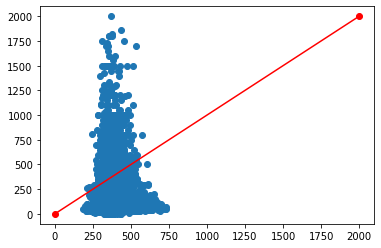

In [85]:
plt.scatter(x=ada.fit(X_over, y_over).predict(X), y=y)
plt.plot([0, 2000], [0, 2000], marker = "o", zorder = 3, color="red")

In [ ]:
def pred_plot(model):
    model.fit(X, y)
    plt.scatter(x=model.predict(X), y = y)
    plt.plot([0, 2000], [0, 2000], marker = "o", zorder = 3, color="red")

In [ ]:
pred_plot(RandomForestRegressor(n_estimators=50, max_depth=14))


In [ ]:
import xgboost as xgb
pred_plot(xgb.XGBRegressor(max_depth=6, learning_rate=0.1, n_estimators=100, min_child_weight = 5))

In [ ]:
mod.predict(X)

In [ ]:
plt.scatter(x=mod.predict(X), y = y)
plt.plot([0, 2000], [0, 2000], marker = "o", zorder = 3, color="red")

In [19]:
final = pd.read_csv("data/test.csv")
final.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,19307997,Super Lux 2BR in Downtown Manhattan,Prepare to be WOWED! This spectacularly bright...,"Top of the line Wolf and Sub-Zero appliances, ...",Prepare to be WOWED! This spectacularly bright...,none,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
1,20176193,Vintage Eclectic Brownstone Pad in Brooklyn,"Ideal for romantic, creative types, this is an...","Not your typical New York abode, my apartment ...","Ideal for romantic, creative types, this is an...",none,Bed Stuy is a diverse historic neighborhood wi...,This is an actual unique living experience whe...,Close to buses and subways there is also free ...,"Entrance hallway, living room, bedroom, kitche...",...,10.0,10.0,10.0,f,f,flexible,f,f,1,1.48
2,19485371,Spacious Harlem Hideaway,"Postive Vibes . This is our Harlem tree house,...",The private room is very spacious and cozy. Th...,"Postive Vibes . This is our Harlem tree house,...",none,You are in a Cultural Haven full of restaurant...,We also keep cucumber water in the fridge feel...,"Train, uber or a taxi. (Extremely taxi accessi...","Private Room, Kitchen And Bathroom",...,10.0,10.0,10.0,t,f,flexible,f,f,1,0.37
3,13079990,Spacius private room in Brooklyn,"Newly renovated apartment, its a 3 bedroom apa...","3 bedroom apartment, 1 full bathroom, living r...","Newly renovated apartment, its a 3 bedroom apa...",none,NaN,NaN,"There is the Mta 3 train Sutter stop, also the...",NaN,...,9.0,8.0,9.0,f,f,flexible,f,f,1,0.23
4,22339757,*Dg) Delightful Private Room 20 min to Manhattan,Hi my home is only 2 blocks from the subway st...,NaN,Hi my home is only 2 blocks from the subway st...,none,NaN,NaN,NaN,NaN,...,8.0,8.0,8.0,t,f,strict_14_with_grace_period,f,f,9,1.53


In [122]:

X, y = preprocessing(airbnb)

In [ ]:
test = test_preprocessing(final)

In [ ]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(max_depth=6, learning_rate=0.1, n_estimators=100, min_child_weight = 5)
mod = xgbr.fit(X, y)

In [ ]:
res = mod.predict(test)
res

In [ ]:
test = drop_initial(final)
test = to_num(test)
test = engineer_features(test)
test = clt.transform(test)

In [ ]:
def to_csv(model, df = final):
    test = drop_initial(final)
    test = to_num(test)
    test = engineer_features(test)
    test = fill_missing(test)
    test = clt.transform(test)
    prediction = final[["id"]].set_index("id")
    prediction["Predicted"] = model.predict(test)
    prediction.to_csv("prediction.csv")

In [ ]:
to_csv()

In [ ]:
prediction = final[["id"]].set_index("id")
prediction["Predicted"] = res
prediction.to_csv("data/prediction.csv")

In [81]:
test = drop_initial(final)
test = to_num(test)
test = engineer_features(test)
test = fill_missing(test)
test = clt.transform(test)
prediction = final[["id"]].set_index("id")
ridge_pred = Ridge(alpha = 5).fit(X, y).predict(test)*0.00
lgb_pred=lgb.LGBMRegressor(max_depth=18, min_data_in_leaf = 23).fit(X, y).predict(test)*0.5
xgb_pred =xgb.XGBRegressor(max_depth=7, learning_rate=0.1, n_estimators=100, min_child_weight = 5).fit(X, y).predict(test)*0.5
res_pred = lgb_pred+xgb_pred+ridge_pred
prediction["Predicted"] = res_pred
prediction.to_csv("output/prediction.csv")

[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23


In [ ]:
Ridge().fit(X_no, y_no).predict(test)

In [ ]:
drop_initial(final).isnull().sum()

In [74]:
ex = data[data["price"]>1500]
ex

,transit,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,market,property_type,room_type,accommodates,...,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,since_year,since_month,since_day
10122,0,0,1,0,Murray Hill,Manhattan,New York,Serviced apartment,Entire home/apt,10,...,9.413376,0,moderate,0,0,0,0.057683,2014.044631,0.875256,7.062702
10123,0,0,0,0,Murray Hill,Manhattan,New York,Serviced apartment,Entire home/apt,9,...,9.396564,0,moderate,0,0,0,0.020436,2014.074104,1.000695,7.084530
10127,1,0,1,0,Murray Hill,Manhattan,New York,Serviced apartment,Entire home/apt,1,...,9.403356,0,moderate,0,0,0,0.000000,2012.027116,10.945948,5.023978
10131,0,0,1,0,Murray Hill,Manhattan,New York,Serviced apartment,Entire home/apt,5,...,7.972174,0,moderate,0,0,0,0.614703,2017.991666,6.000032,28.077438
10140,0,0,1,0,Murray Hill,Manhattan,New York,Serviced apartment,Entire home/apt,1,...,9.397560,0,moderate,0,0,6,0.026035,2010.969657,9.986771,6.838044
10146,0,0,1,0,Murray Hill,Manhattan,New York,Serviced apartment,Entire home/apt,15,...,9.980647,0,moderate,0,0,2,1.343606,2016.981938,9.033047,14.148947
10147,1,0,1,0,Murray Hill,Manhattan,New York,Serviced apartment,Entire home/apt,15,...,9.994682,0,moderate,0,0,2,1.341151,2016.995773,9.099766,13.839646
10150,0,1,0,0,Murray Hill,Manhattan,New York,Serviced apartment,Entire home/apt,10,...,9.006611,1,moderate,0,0,1,3.023342,2016.990856,3.875997,19.968988
10151,0,0,1,0,Murray Hill,Manhattan,New York,Serviced apartment,Entire home/apt,11,...,9.030652,1,moderate,0,0,0,2.991431,2016.972771,4.000274,20.317349
10156,0,0,1,0,Murray Hill,Manhattan,New York,Serviced apartment,Entire home/apt,1,...,9.405831,0,moderate,0,0,1,0.000000,2016.049687,5.076849,26.883124
